In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import svm

/Users/vikasshah/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
QuarterData1 = pd.read_csv('Sample_Orgination_Validated_2006.csv',index_col=None)

/Users/vikasshah/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
QuarterData1.dtypes

LOAN_SEQUENCE_NUMBER                        object
MONTHLY_REPORTING_PERIOD                     int64
CURRENT_ACTUAL_UPB                         float64
CURRENT_LOAN_DELINQUENCY_STATUS             object
LOAN_AGE                                     int64
REMAINING_MONTHS_TO_LEGAL_MATURITY           int64
REPURCHASE_FLAG                             object
MODIFICATION_FLAG                           object
ZERO_BALANCE_CODE                          float64
ZERO_BALANCE_EFFECTIVE_DATE                float64
CURRENT_INTEREST_RATE                      float64
CURRENT_DEFERRED_UPB                       float64
DUE_DATE_OF_LAST_PAID_INSTALLMENT_DDLPI    float64
MI_RECOVERIES                              float64
NET_SALES_PROCEEDS                          object
NON_MI_RECOVERIES                           object
EXPENSES                                   float64
Legal_Costs                                float64
Maintenance_and_Preservation_Costs         float64
Taxes_and_Insurance            

In [19]:
QD = QuarterData1

In [20]:
QD = QD.convert_objects(convert_numeric=True)

/Users/vikasshah/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [21]:
pd.isnull(QD).sum() > 0

LOAN_SEQUENCE_NUMBER                       False
MONTHLY_REPORTING_PERIOD                   False
CURRENT_ACTUAL_UPB                         False
CURRENT_LOAN_DELINQUENCY_STATUS             True
LOAN_AGE                                   False
REMAINING_MONTHS_TO_LEGAL_MATURITY         False
REPURCHASE_FLAG                            False
MODIFICATION_FLAG                          False
ZERO_BALANCE_CODE                          False
ZERO_BALANCE_EFFECTIVE_DATE                False
CURRENT_INTEREST_RATE                      False
CURRENT_DEFERRED_UPB                       False
DUE_DATE_OF_LAST_PAID_INSTALLMENT_DDLPI    False
MI_RECOVERIES                              False
NET_SALES_PROCEEDS                          True
NON_MI_RECOVERIES                           True
EXPENSES                                   False
Legal_Costs                                False
Maintenance_and_Preservation_Costs         False
Taxes_and_Insurance                        False
Miscellaneous_Expens

In [22]:
QD['CURRENT_LOAN_DELINQUENCY_STATUS'].replace('nan',999,inplace=True)

In [23]:
QD['Deliquent'] = (QD.CURRENT_LOAN_DELINQUENCY_STATUS>0).astype(int)

In [24]:
QD['Deliquent'].unique()

array([0, 1])

In [25]:
QD['ZERO_BALANCE_CODE'].unique()

array([ 0.,  1.,  3.,  9.,  6.])

In [26]:
QD['MODIFICATION_FLAG'] = QD['MODIFICATION_FLAG'].replace('Y',1)
QD['MODIFICATION_FLAG'] = QD['MODIFICATION_FLAG'].replace('U',0)
QD['MODIFICATION_FLAG'] = QD['MODIFICATION_FLAG'].replace('N',1)

QD['REPURCHASE_FLAG'] = QD['REPURCHASE_FLAG'].replace('U',0)
QD['REPURCHASE_FLAG'] = QD['REPURCHASE_FLAG'].replace('N',2)
QD['REPURCHASE_FLAG'] = QD['REPURCHASE_FLAG'].replace('Y',1)

QD['EXPENSES'].fillna(0,inplace=True)
QD['NET_SALES_PROCEEDS'].fillna(0,inplace=True)
QD['NON_MI_RECOVERIES'].fillna(0,inplace=True)

In [27]:
QD.head()

,LOAN_SEQUENCE_NUMBER,MONTHLY_REPORTING_PERIOD,CURRENT_ACTUAL_UPB,CURRENT_LOAN_DELINQUENCY_STATUS,LOAN_AGE,REMAINING_MONTHS_TO_LEGAL_MATURITY,REPURCHASE_FLAG,MODIFICATION_FLAG,ZERO_BALANCE_CODE,ZERO_BALANCE_EFFECTIVE_DATE,...,MI_RECOVERIES,NET_SALES_PROCEEDS,NON_MI_RECOVERIES,EXPENSES,Legal_Costs,Maintenance_and_Preservation_Costs,Taxes_and_Insurance,Miscellaneous_Expenses,Actual_Loss_Calculation,Deliquent
0,F106Q1000086,200602,128000.0,0.0,0,360,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,F106Q1000086,200603,128000.0,0.0,1,359,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,F106Q1000086,200604,128000.0,0.0,2,358,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,F106Q1000086,200605,127000.0,0.0,3,357,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,F106Q1000086,200606,127000.0,0.0,4,356,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [28]:
QD['CURRENT_LOAN_DELINQUENCY_STATUS'].unique()

array([   0.,    1.,    2.,    3.,    4.,    8.,    9.,   10.,   11.,
         12.,    5.,    6.,    7.,   13.,   14.,   28.,   29.,   30.,
         31.,   32.,   33.,   34.,   35.,   36.,   37.,   38.,   39.,
         40.,   41.,   42.,   43.,   44.,   45.,   46.,   47.,   48.,
         49.,   50.,   51.,   52.,   53.,   54.,   55.,   56.,   57.,
         58.,   59.,   60.,   61.,   62.,   63.,   64.,   65.,   66.,
         67.,   68.,   69.,   70.,   71.,   72.,   73.,   74.,   75.,
         15.,   16.,   17.,   18.,   19.,   20.,   21.,   22.,   23.,
         24.,   25.,   26.,   27.,  999.,   76.,   77.,   78.,   79.,
         80.,   81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,
         89.,   90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,
         98.,   99.,  100.,  101.,  102.])

In [ ]:
MONTHLY_REPORTING_PERIOD                   
CURRENT_ACTUAL_UPB                                    
LOAN_AGE                                   
REMAINING_MONTHS_TO_LEGAL_MATURITY         
#REPURCHASE_FLAG                            
#MODIFICATION_FLAG
CURRENT_INTEREST_RATE                      
CURRENT_DEFERRED_UPB
MI_RECOVERIES
Actual_Loss_Calculation 

In [29]:
y =QD['Deliquent']
colsToKeep = ['LOAN_AGE','ZERO_BALANCE_CODE','REPURCHASE_FLAG','MODIFICATION_FLAG','CURRENT_INTEREST_RATE',
             'CURRENT_DEFERRED_UPB','REMAINING_MONTHS_TO_LEGAL_MATURITY','NET_SALES_PROCEEDS','NON_MI_RECOVERIES','Actual_Loss_Calculation']
#'LOAN_AGE','REMAINING_MONTHS_TO_LEGAL_MATURITY','CURRENT_INTEREST_RATE','CURRENT_DEFERRED_UPB','CURRENT_ACTUAL_UPB']
#'REMAINING_MONTHS_TO_LEGAL_MATURITY,'NET_SALES_PROCEEDS','NON_MI_RECOVERIES','Actual_Loss_Calculation'
X = QD[colsToKeep]

y = np.ravel(y)



In [15]:
Xtrain, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [16]:
model = LogisticRegression()
mod_fit = model.fit(Xtrain,y_train)

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(mod_fit, open(filename, 'wb'))

In [392]:
print(model.score(Xtrain,y_train))

0.953001561699


In [30]:
pred = mod_fit.predict(X)
pred
print (len(pred))
print (len(y_test))

2888628
888349


In [31]:
metrics.accuracy_score(y,pred)

0.9254365740413788

In [395]:
print (metrics.confusion_matrix(y_test,pred))

[[845533     47]
 [ 41630   1139]]


In [396]:
pd.crosstab(pred, y_test,rownames=['pred'],colnames=['ytest'])

ytest,0,1
pred,,
0,845533,41630
1,47,1139


In [310]:
model.coef_

array([[  2.61075694e-06,  -2.91087863e-05,   2.29606937e-02,
          4.12396044e-03,   5.29538708e-05,  -1.45056918e-05,
          5.32066786e-05,   5.32066786e-05,  -1.72397176e-04]])

In [397]:
logit = sm.Logit(QD['Deliquent'], QD[colsToKeep])
reges_mod = logit.fit()
print(reges_mod.summary())

Optimization terminated successfully.
         Current function value: 0.191433
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Deliquent   No. Observations:              3553395
Model:                          Logit   Df Residuals:                  3553391
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 Mar 2017   Pseudo R-squ.:                0.009348
Time:                        16:23:43   Log-Likelihood:            -6.8024e+05
converged:                       True   LL-Null:                   -6.8666e+05
                                        LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
ZERO_BALANCE_CODE         2.7472      0.047     58.500      0.000         2.655     2.

# with EXPENSES the curve is on the diagonal, 

good set.. ROC is good
'LOAN_AGE','REMAINING_MONTHS_TO_LEGAL_MATURITY','CURRENT_INTEREST_RATE',
             'CURRENT_DEFERRED_UPB','NET_SALES_PROCEEDS','NON_MI_RECOVERIES']

### ROC 

In [277]:
y = np.ravel(y)

In [278]:
Xtrain, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [404]:
model = LogisticRegression()
model = model.fit(Xtrain,y_train)

In [405]:
y_pred = model.predict(X_test)

In [406]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[845533     47]
 [ 41630   1139]]


In [407]:
preds = model.predict_proba(X_test)[:,1]
fpr,tpr, _ = roc_curve(y_test,preds)


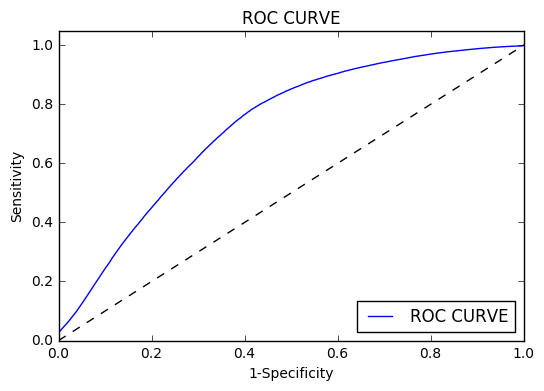

In [408]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#### SVM

In [417]:
y =QD['Deliquent']
colsToKeep = ['LOAN_AGE','ZERO_BALANCE_CODE','REPURCHASE_FLAG','MODIFICATION_FLAG','CURRENT_INTEREST_RATE',
             'CURRENT_DEFERRED_UPB']
#'LOAN_AGE','REMAINING_MONTHS_TO_LEGAL_MATURITY','CURRENT_INTEREST_RATE','CURRENT_DEFERRED_UPB','CURRENT_ACTUAL_UPB']
#'REMAINING_MONTHS_TO_LEGAL_MATURITY,'NET_SALES_PROCEEDS','NON_MI_RECOVERIES','Actual_Loss_Calculation'
X = QD[colsToKeep]

#y = np.ravel(y)

Xtrain, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [413]:
ax = Xtrain
ay = y_train

In [419]:
y_train.value_counts()

0    2536471
1     128575
Name: Deliquent, dtype: int64

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(ax,ay)

In [ ]:
pred = clf.predict(X_test)
pred

In [ ]:
pd.crosstab(pred, y_test,rownames=['pred'],colnames=['ytest'])